Enter the text to analyze sentiment:  the product was average


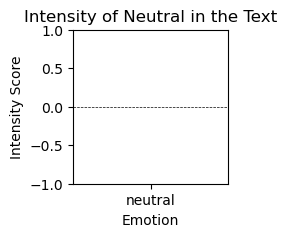

Detected Emotion: neutral


In [3]:
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()


def map_intensity_to_emotion(score):
    if score >= 0.5:
        return 'joy'
    elif score >= 0.05 and score < 0.5:
        return 'pleasant'
    elif score >= -0.05 and score < 0.05:
        return 'neutral'
    elif score > -0.5 and score < -0.05:
        return 'disappointed'
    else:
        return 'sad'


def analyze_sentiment(text):
    
    vader_scores = analyzer.polarity_scores(text)
    
    emotion = map_intensity_to_emotion(vader_scores['compound'])
    return vader_scores, emotion

text = input("Enter the text to analyze sentiment: ")
vader_scores, emotion = analyze_sentiment(text)

color = 'grey'
alpha = 1.0
if vader_scores['compound'] >= 0.1:
    color = 'green'
    alpha = 0.7  
elif vader_scores['compound'] <= -0.1:
    color = 'red'
    alpha = 0.9  


plt.figure(figsize=(2, 2))
plt.bar(emotion, vader_scores['compound'], color=color, alpha=alpha)
plt.xlabel('Emotion')
plt.ylabel('Intensity Score')
plt.title(f'Intensity of {emotion.capitalize()} in the Text')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  
plt.xlim(-1, 1)  
plt.ylim(-1, 1) 
plt.show()

print("Detected Emotion:", emotion)
